In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [104]:
df = pd.read_csv('diabetes.csv')

In [105]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [106]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [107]:
median_target('Insulin'), median_target('Glucose'), median_target('SkinThickness'), median_target('BloodPressure'), median_target('BMI')

(   Outcome  Insulin
 0        0    102.5
 1        1    169.5,
    Outcome  Glucose
 0        0    107.0
 1        1    140.0,
    Outcome  SkinThickness
 0        0           27.0
 1        1           32.0,
    Outcome  BloodPressure
 0        0           70.0
 1        1           74.5,
    Outcome   BMI
 0        0  30.1
 1        1  34.3)

In [108]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

In [109]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

In [110]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [111]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [112]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [113]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [114]:
z_threshold = 3

z_scores = stats.zscore(df)

outlier_rows = (z_scores > z_threshold).any(axis=1)

In [115]:
df = df[~outlier_rows]

In [116]:
df.shape

(721, 9)

In [117]:
correlation_with_output = df.corr()['Outcome'].drop('Outcome')

correlation_with_output

Pregnancies                 0.219036
Glucose                     0.491905
BloodPressure               0.201790
SkinThickness               0.290715
Insulin                     0.479283
BMI                         0.304239
DiabetesPedigreeFunction    0.209656
Age                         0.246216
Name: Outcome, dtype: float64

In [118]:
features_to_drop = ['BloodPressure', 'Pregnancies', 'DiabetesPedigreeFunction']
df.drop(columns=features_to_drop, inplace=True)

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(df)

In [120]:
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.describe()

,Glucose,SkinThickness,Insulin,BMI,Age,Outcome
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.490135,0.461947,0.301198,0.401468,0.253312,0.335645
std,0.191359,0.175920,0.157369,0.186900,0.240481,0.472543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354839,0.382979,0.226098,0.265130,0.063830,0.000000
50%,0.458065,0.446809,0.226098,0.397695,0.170213,0.000000
75%,0.606452,0.531915,0.399225,0.515850,0.404255,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


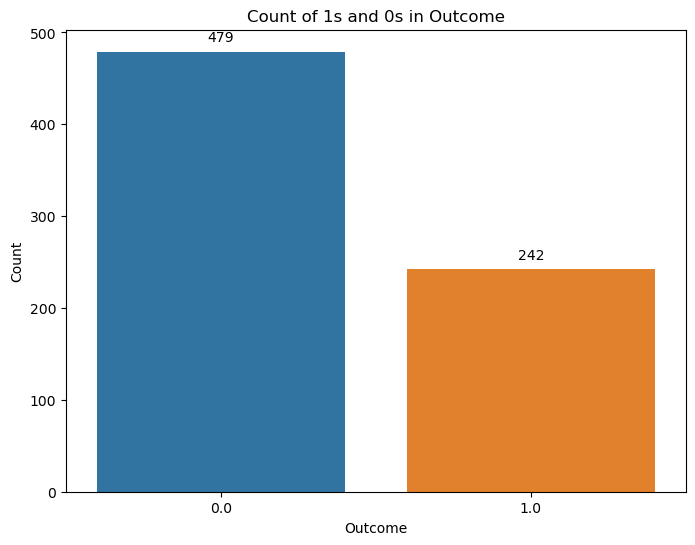

In [121]:
plt.figure(figsize=(8, 6))
count_plot = sns.countplot(x='Outcome', data=scaled_data)

# Annotate the bars with the counts
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')

# Add title and labels
plt.title('Count of 1s and 0s in Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Show the plot
plt.show()

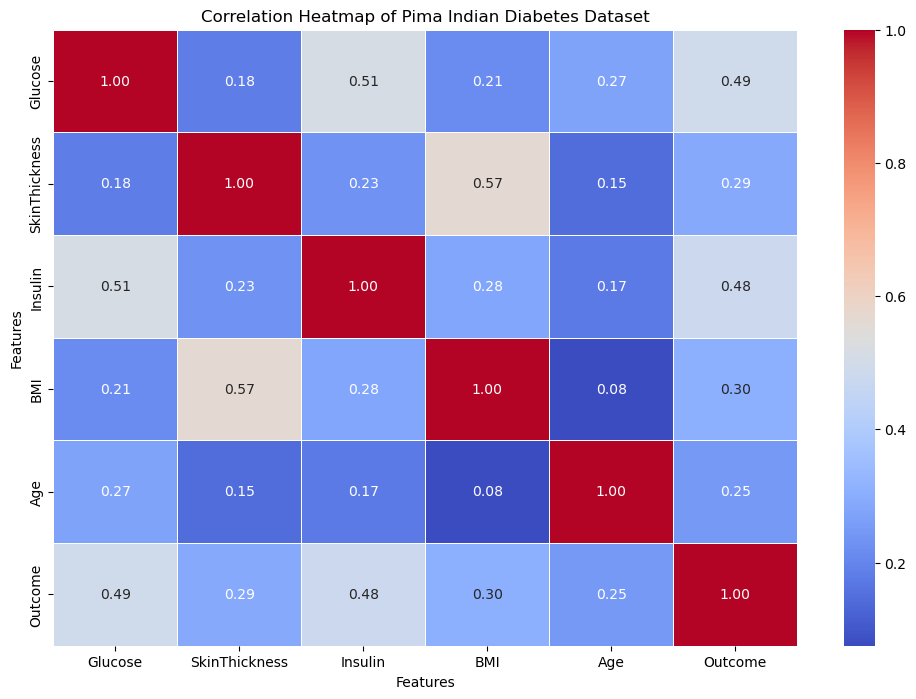

In [122]:
correlation_matrix = scaled_data.corr()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Pima Indian Diabetes Dataset')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [123]:
X = scaled_data.drop(columns='Outcome')
y = scaled_data['Outcome']

In [124]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [126]:
dt = DecisionTreeClassifier()
# clf.fit(X_train, y_train)

nb = GaussianNB()
# nb.fit(X_train, y_train)

knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

lr = LogisticRegression()
# lr.fit(X_train, y_train)

ab = AdaBoostClassifier()
# ab.fit(X_train, y_train)

svm = SVC(probability=True)
# svm.fit(X_train, y_train)

rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

In [127]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [26]:
param_dist_dt = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']  
}

random_dt = RandomizedSearchCV(dt, param_distributions=param_dist_dt, n_iter=100, cv=5, verbose=1, n_jobs=-1)

random_dt.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47BCED150>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47C53C250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47B2040D0>,
                                        'splitter': ['best', 'random']},
                   verbose=1)

In [27]:
param_dist_nb = {
    'var_smoothing': uniform(1e-11, 1e-9)
}

random_nb = RandomizedSearchCV(nb, param_distributions=param_dist_nb, n_iter=100, cv=5, verbose=1, n_jobs=-1)

random_nb.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'var_smoothing': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D47C52DC50>},
                   verbose=1)

In [28]:
param_dist_knn = {
    'n_neighbors': randint(1, 30),  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': randint(20, 50),  # Leaf size passed to BallTree or KDTree
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

random_knn = RandomizedSearchCV(knn, param_distributions=param_dist_knn, n_iter=100, cv=5, verbose=1, n_jobs=-1)

random_knn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47C554650>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47C909710>,
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=1)

In [29]:
param_dist_lr = {
    'C': uniform(0.01, 10),  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization term
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Algorithm to use in the optimization problem
    'l1_ratio': uniform(0, 1),  # Ratio of l1 regularization term for 'elasticnet' penalty
    'fit_intercept': [True, False],  # Whether to add a constant (bias) term
    'class_weight': [None, 'balanced']  # Weights associated with classes
}

# Initialize the RandomizedSearchCV object
random_lr = RandomizedSearchCV(lr, param_distributions=param_dist_lr, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_lr.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D47BD1D090>,
                                        'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D47BCECF10>,
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   random_state=42, verbose=1)

In [30]:
param_dist_ab = {
   'n_estimators': randint(50, 500),  # Number of boosting stages
   'learning_rate': uniform(0.01, 1.0)  # Learning rate
}

# Initialize the RandomizedSearchCV object
random_ab = RandomizedSearchCV(ab, param_distributions=param_dist_ab, n_iter=100, cv=5, verbose=1, n_jobs=-1)

# Fit the model
random_ab.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D47C9C96D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47C994E50>},
                   verbose=1)

In [31]:
param_dist_svm = {
    'C': uniform(0.1, 10),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, num=100, base=10))  # Kernel coefficient
}

# Initialize the RandomizedSearchCV object
random_svm = RandomizedSearchCV(svm, param_distributions=param_dist_svm, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_svm.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002D47C3E5510>,
                                        'gamma': ['scale', 'auto', 0.001,
                                                  0.0011233240329780276,
                                                  0.0012618568830660211,
                                                  0.0014174741629268048,
                                                  0.0015922827933410922,
                                                  0.001788649529057435,
                                                  0.002009233002565048,
                                                  0.002...
                                                  0.0050941380148163806,
                                                  0.00572236765935022,
                                                  0.006428073117284319,
                                                  0.007220809018385464,
                                                  0.008111308307896872,
                                                  0.009111627561154887,
                                                  0.010235310218990263,
                                                  0.011497569953977356,
                                                  0.01291549665014884,
                                                  0.014508287784959394,
                                                  0.016297508346206444,
                                                  0.01830738280295368,
                                                  0.020565123083486514,
                                                  0.02310129700083159, ...],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=1)

In [32]:
param_dist_rf = {
    'n_estimators': randint(50, 500),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': randint(1, 20),  # Maximum depth of the trees
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Initialize the RandomizedSearchCV object
random_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47CA30F50>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47CA6FD50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47C9B9A50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D47C9960D0>},
                   random_state=42, verbose=1)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

model_metrics = {}

models_dict = {
    "Logistic Regression": random_lr,
    "AdaBoost": random_ab,
    "SVM": random_svm,
    "Random Forest": random_rf,
    "Decision Tree": random_dt,
    "Naive Bayes": random_nb,
    "KNN": random_knn
}

for model_name, model in models_dict.items():
    y_pred = model.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_test, y_pred)
    cv = cross_val_score(model, X, y).mean()
    f1 = f1_score(y_test, y_pred)
    precision = tn/(tn+fn)
    recall = tn/(tn+fp)
    
    model_metrics[model_name] = {'Accuracy': accuracy, 'CV': cv, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}

metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')

metrics_df

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 5

,Accuracy,CV,F1 Score,Precision,Recall
Logistic Regression,0.798165,0.812739,0.755556,0.913793,0.757143
AdaBoost,0.871560,0.877912,0.825000,0.911765,0.885714
SVM,0.844037,0.869598,0.784810,0.884058,0.871429
Random Forest,0.889908,0.879310,0.850000,0.926471,0.900000
Decision Tree,0.844037,0.855738,0.773333,0.863014,0.900000
Naive Bayes,0.834862,0.807193,0.769231,0.871429,0.871429
KNN,0.889908,0.870996,0.846154,0.914286,0.914286


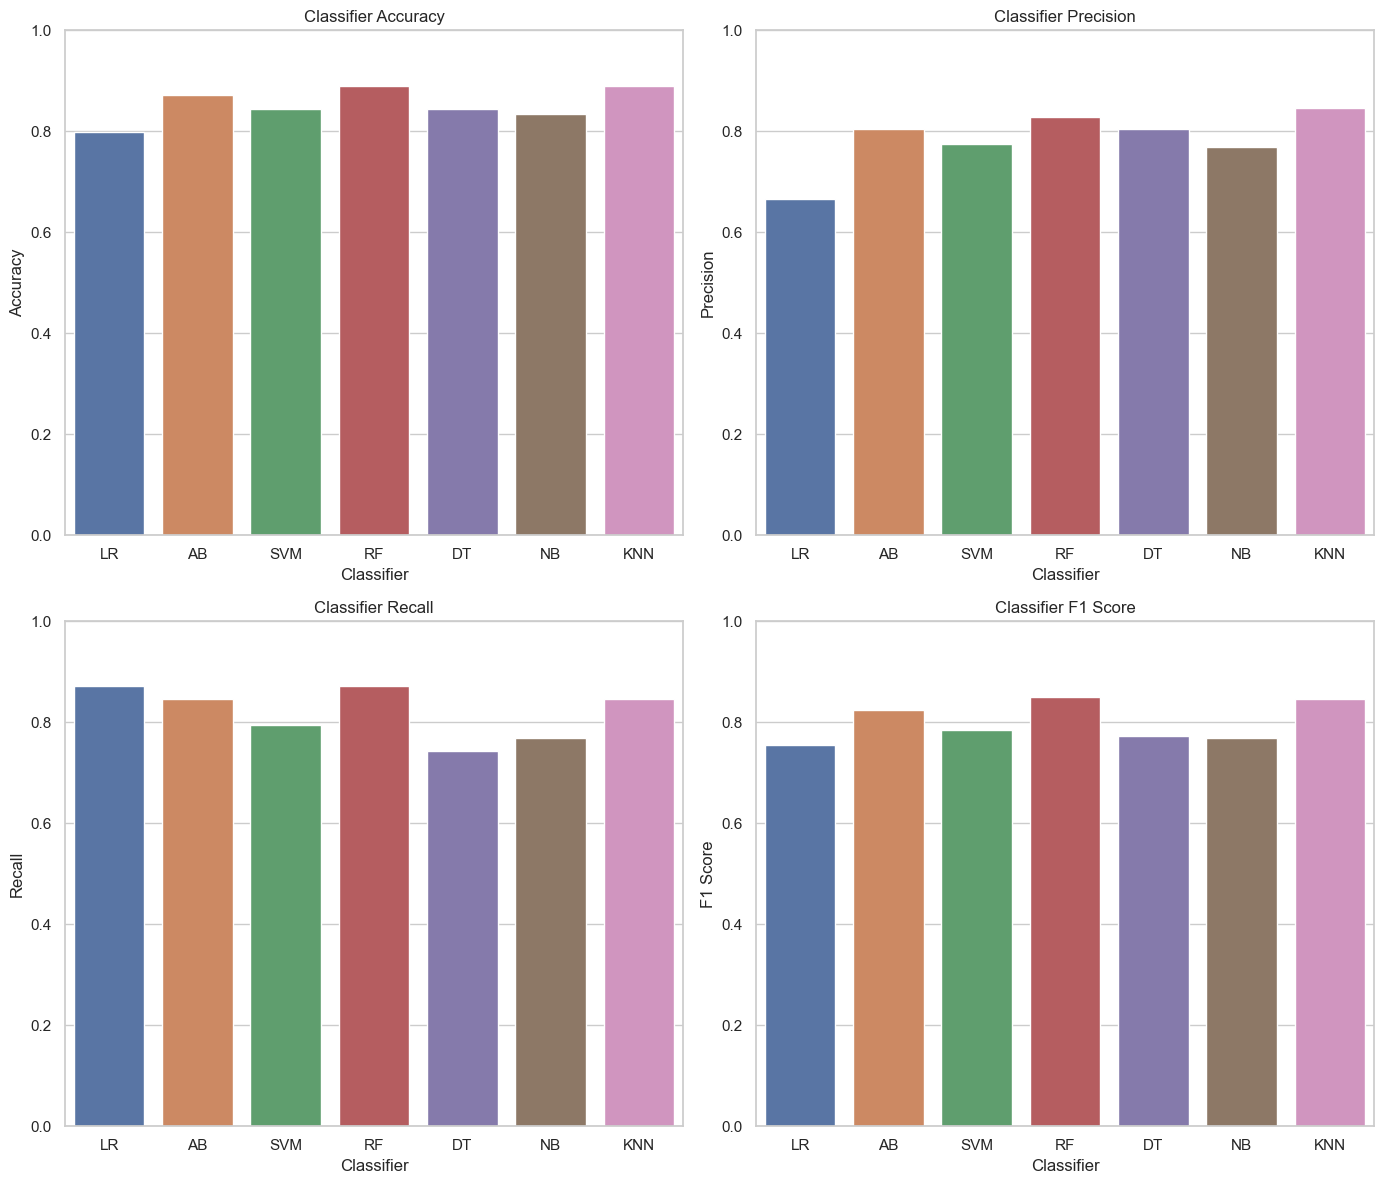

In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


classifiers = {
    "LR": random_lr,
    "AB": random_ab,
    "SVM": random_svm,
    "RF": random_rf,
    "DT": random_dt,
    "NB": random_nb,
    "KNN": random_knn
}

metrics = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    
    metrics['Classifier'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))

metrics_df = pd.DataFrame(metrics)

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Accuracy plot
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df, ax=axes[0, 0])
axes[0, 0].set_title('Classifier Accuracy')
axes[0, 0].set_ylim(0, 1)

# Precision plot
sns.barplot(x='Classifier', y='Precision', data=metrics_df, ax=axes[0, 1])
axes[0, 1].set_title('Classifier Precision')
axes[0, 1].set_ylim(0, 1)

# Recall plot
sns.barplot(x='Classifier', y='Recall', data=metrics_df, ax=axes[1, 0])
axes[1, 0].set_title('Classifier Recall')
axes[1, 0].set_ylim(0, 1)

# F1 Score plot
sns.barplot(x='Classifier', y='F1 Score', data=metrics_df, ax=axes[1, 1])
axes[1, 1].set_title('Classifier F1 Score')
axes[1, 1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()
plt.savefig('classifier_metrics.png')

plt.show()

In [81]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def model_builder(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=8, max_value=128, step=8), activation='relu', input_shape=(5,)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=8, max_value=128, step=8), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units3', min_value=8, max_value=128, step=8), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [82]:
import tensorflow as tf
tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=20, factor=3, directory='my_dir', project_name='diabetes_tuning')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Reloading Tuner from my_dir\diabetes_tuning\tuner0.json


In [83]:
# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}")
print(f"Best units2: {best_hps.get('units2')}")
print(f"Best units3: {best_hps.get('units3')}")
print(f"Best dropout1: {best_hps.get('dropout1')}")
print(f"Best dropout2: {best_hps.get('dropout2')}")
print(f"Best learning_rate: {best_hps.get('learning_rate')}")


Best units1: 128
Best units2: 24
Best units3: 8
Best dropout1: 0.30000000000000004
Best dropout2: 0.30000000000000004
Best learning_rate: 0.001


In [84]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=16)

Epoch 1/100
35/35 [==============================] - 2s 10ms/step - loss: 0.6660 - accuracy: 0.6218 - val_loss: 0.6842 - val_accuracy: 0.7097
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.7418 - val_loss: 0.6589 - val_accuracy: 0.8387
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.7927 - val_loss: 0.6151 - val_accuracy: 0.8548
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 0.4546 - accuracy: 0.8000 - val_loss: 0.5752 - val_accuracy: 0.7581
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4491 - accuracy: 0.8055 - val_loss: 0.5409 - val_accuracy: 0.7581
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.8182 - val_loss: 0.5128 - val_accuracy: 0.7419
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 0.4252 - accuracy: 0.8000 - val_loss: 0.4847 - val_accuracy: 0.8226
Epoch 8/100


Epoch 59/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.8582 - val_loss: 0.2534 - val_accuracy: 0.9194
Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8618 - val_loss: 0.2747 - val_accuracy: 0.9194
Epoch 61/100
35/35 [==============================] - 0s 7ms/step - loss: 0.3255 - accuracy: 0.8691 - val_loss: 0.2763 - val_accuracy: 0.9032
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8600 - val_loss: 0.2768 - val_accuracy: 0.9032
Epoch 63/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.8727 - val_loss: 0.2738 - val_accuracy: 0.9032
Epoch 64/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3155 - accuracy: 0.8655 - val_loss: 0.2766 - val_accuracy: 0.9194
Epoch 65/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8764 - val_loss: 0.2855 - val_accuracy: 0.9194
Epoch 

In [85]:
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)
print(classification_report(y_test, y_pred_nn))

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89        70
         1.0       0.83      0.74      0.78        39

    accuracy                           0.85       109
   macro avg       0.85      0.83      0.84       109
weighted avg       0.85      0.85      0.85       109



In [86]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               768       
                                                                 
 batch_normalization_17 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 24)                3096      
                                                                 
 batch_normalization_18 (Ba  (None, 24)                96        
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 24)               

In [87]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def model_builder(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=8, max_value=128, step=8), activation='relu', input_shape=(5,)))
    model.add(BatchNormalization())
    model.add(Dense(units=hp.Int('units2', min_value=8, max_value=128, step=8), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=hp.Int('units3', min_value=8, max_value=128, step=8), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=hp.Int('units4', min_value=8, max_value=128, step=8), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [88]:
tuner = kt.Hyperband(model_builder, objective='val_accuracy', 
                     max_epochs=20, factor=3, directory='my_dir', project_name='diabetes_tuning')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Reloading Tuner from my_dir\diabetes_tuning\tuner0.json


In [89]:
# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}")
print(f"Best units2: {best_hps.get('units2')}")
print(f"Best units3: {best_hps.get('units3')}")
print(f"Best units4: {best_hps.get('units4')}")
print(f"Best learning_rate: {best_hps.get('learning_rate')}")


Best units1: 24
Best units2: 56
Best units3: 24
Best units4: 80
Best learning_rate: 0.01


In [90]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
39/39 [==============================] - 2s 2ms/step - loss: 0.4783 - accuracy: 0.7761
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8382
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8382
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8546
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8366
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8791
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8497
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8807
Epoch 9/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8725
Epoch 10/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8415
Epoch 11/

39/39 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8660
Epoch 84/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8824
Epoch 85/100
39/39 [==============================] - 0s 3ms/step - loss: 0.3067 - accuracy: 0.8938
Epoch 86/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8824
Epoch 87/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8807
Epoch 88/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8840
Epoch 89/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8856
Epoch 90/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8775
Epoch 91/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8791
Epoch 92/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8922
Epoch 93/100


In [91]:
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)
print(classification_report(y_test, y_pred_nn))

4/4 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        70
         1.0       0.82      0.82      0.82        39

    accuracy                           0.87       109
   macro avg       0.86      0.86      0.86       109
weighted avg       0.87      0.87      0.87       109



In [92]:
100*accuracy_score(y_pred_nn, y_test)

87.1559633027523

In [93]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 24)                144       
                                                                 
 batch_normalization_19 (Ba  (None, 24)                96        
 tchNormalization)                                               
                                                                 
 dense_38 (Dense)            (None, 56)                1400      
                                                                 
 batch_normalization_20 (Ba  (None, 56)                224       
 tchNormalization)                                               
                                                                 
 dense_39 (Dense)            (None, 24)                1368      
                                                                 
 batch_normalization_21 (Ba  (None, 24)               

In [135]:
from tensorflow.keras.models import load_model
model_try = load_model('90_model.h5')

In [136]:
y_pr = model_try.predict(X_train)
y_pr = (y_pr > 0.5).astype(int)
print(classification_report(y_train, y_pr))

20/20 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       409
         1.0       0.90      0.88      0.89       203

    accuracy                           0.93       612
   macro avg       0.92      0.91      0.92       612
weighted avg       0.93      0.93      0.93       612



In [137]:
print(accuracy_score(y_pr, y_train))

0.9264705882352942


In [138]:
y_pred_nn_try = model_try.predict(X_test)
y_pred_nn_try = (y_pred_nn_try > 0.5).astype(int)
print(classification_report(y_test, y_pred_nn_try))

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92        70
         1.0       0.87      0.85      0.86        39

    accuracy                           0.90       109
   macro avg       0.89      0.89      0.89       109
weighted avg       0.90      0.90      0.90       109



In [139]:
100*accuracy_score(y_pred_nn_try, y_test)

89.90825688073394

4/4 [==============================] - 0s 7ms/step


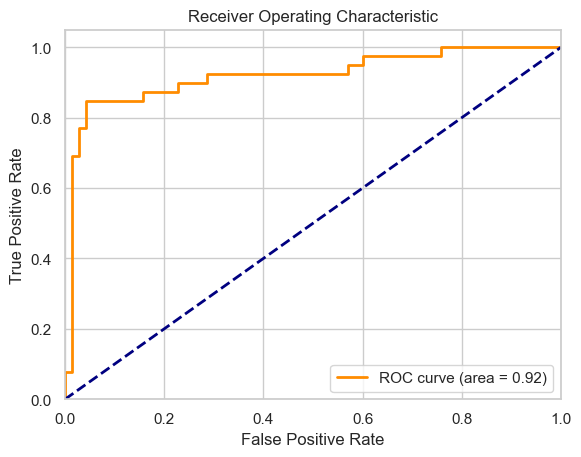

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = model_try.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()

In [141]:
model_try.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               768       
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 24)                3096      
                                                                 
 batch_normalization_3 (Bat  (None, 24)                96        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 8)                 200       
                                                                 
 batch_normalization_4 (Bat  (None, 8)                